# Exploring categorical variables

## Waffle chart

We first need to install a new module (only once)

In [1]:
# !conda install --y -c conda-forge pywaffle

Solving environment: done

## Package Plan ##

  environment location: /Users/jankirenz/opt/anaconda3

  added / updated specs:
    - pywaffle


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pywaffle-0.6.1             |     pyh9f0ad1d_0         459 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         459 KB

The following NEW packages will be INSTALLED:

  pywaffle           conda-forge/noarch::pywaffle-0.6.1-pyh9f0ad1d_0



pywaffle-0.6.1       | 459 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Import data

In [7]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loans.csv"

df = pd.read_csv(ROOT + DATA)

df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,mortgage,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,rent,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,rent,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,rent,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,rent,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
df.homeownership = df.homeownership.astype("category")
df.application_type = df.application_type.astype("category")

## Waffle chart

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt
from pywaffle import Waffle

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"

colors_blue = [blue_dark, blue, blue_light]
colors = [blue_dark, blue, orange, grey_dark, grey, grey_light]

 Waffle chart of homeownership, with levels rent, morgage, and own:

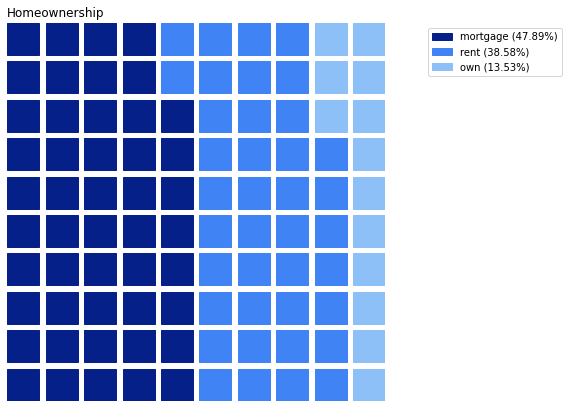

In [82]:
data = (df.homeownership.value_counts() / df.homeownership.value_counts().sum())*100
values = data.round(2).to_dict()

fig = plt.figure(
    figsize=(8,8),
    FigureClass=Waffle,
    rows=10,
    values=values,
    colors=colors_blue,
    title={'label': 'Homeownership', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in values.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

Waffle chart of loan status, with levels current, fully paid, in grade period, and late.:

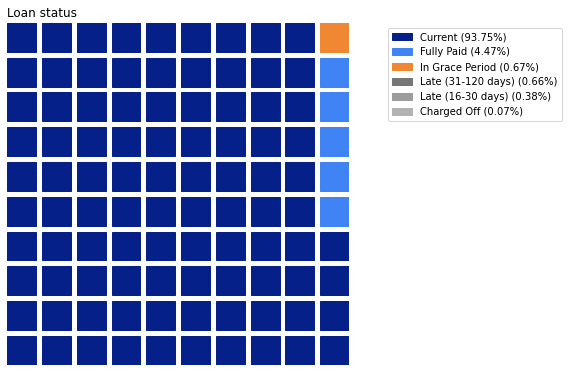

In [87]:
data = (df.loan_status.value_counts() / df.loan_status.value_counts().sum())*100
values = data.round(2).to_dict()

fig = plt.figure(
    figsize=(8,8),
    FigureClass=Waffle,
    rows=10,
    values=values,
    colors=colors,
    title={'label': 'Loan status', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in values.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)